![intro-to-clustering](https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2019/08/introduction-to-clustering.png)
Image from https://data-flair.training/blogs/clustering-in-machine-learning/


## Clustering

Goal: organize similar items into groups.


### Applications

* Marketing, e.g. market research, grouping of shopping items [1].

* Bioinformatics, e.g. to group homologous sequences into gene families [1].

* Social network analysis, e.g. to recognize communities withit large groups of people [1].

* Grouping of search results

* and many more


### Problem statement

* **Given**: $X$, but no $y$.

* **Desired**: separate $X$ into $K$ groups of similar objects.

* **Required**: defined distance $\rho(x_i, x_j)$ between objects.

What to fit?

![clustering](clustering.png)
Image from https://cs.wmich.edu/alfuqaha/summer14/cs6530/lectures/ClusteringAnalysis.pdf

For example, model parameters can be chosen to minimize the ratio:

$$\frac{\text{distance between objects in cluster}}{\text{distance between clusters}}$$


### Types of clustering

**Hard clustering**

Assign each object to one particular cluster.

**Soft clustering**

Assign each object to all clusters with a certain probability.

**Hierarchical clustering**

Group objects into nested clusters. There are two main types of the hierarchical clustering:

- *Agglomerative* - start from assigning each point to a separate cluster. At each iteration merge two closest clusters together. Continue until desired amount of clusters (for example, $k$) will be reached.

- *Divisive* - start from assigning all points to a one large cluster. At each iteration split clusters until the desired amount of cluster is reached.

For better introduction to hierarchical clustering, please refer to [5].

### Clustering methods

Due to time limits only a few clustering methods will be presented in this tutorial. More comprehensive list of clustering methods can be found, for example, in `scikit-learn` documentation ([2, 3]).

**K-means**

The k-means algorithm divides a set of $N$ samples into $K$ disjoint clusters $C$, each described by the mean $\mu_j$ of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from $X$, although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

$$\sum\limits_{i=0}^n \underset{\mu_j\in C}{min}(||x_i - \mu_j||^2)$$

How it works:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

Generate dataset and choose some random centers.

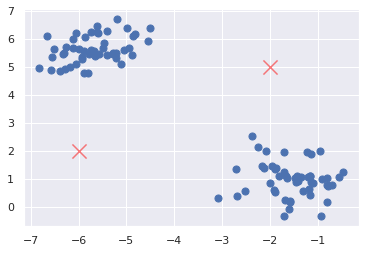

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=100, centers=2,
                       cluster_std=0.60, random_state=85747)

# create numpy array of shape(2,2) with some float numbers
centers = np.array([[-6.0, 2.0], [-2.0, 5.0]])
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='red', s=200, alpha=0.5);

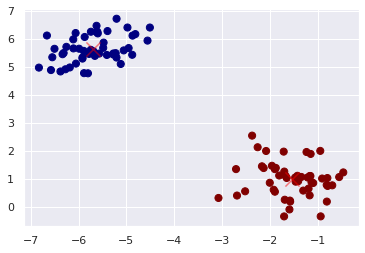

In [5]:
from sklearn.metrics import mean_squared_error as distance
y_kmeans = np.zeros(X.shape[0])

# assign each point to the closest center:
# set y_kmeans[i] = 0 if the i-th point is closer to the first center, e.g. centers[0]
# set y_kmeans[i] = 1 if the i-th point is closer to the second center, e.g. centers[1]
# use distance(centers[k], x) to measure the distance between point x=X[i] and center

for i, x in enumerate(X):
    if distance(centers[1], x) < distance(centers[0], x):
        y_kmeans[i] = 1
    else:
        y_kmeans[i] = 0 # needed if you want to repeat this iteration
        
# compute new centroids
centers[0] = np.mean(X[y_kmeans==0], axis=0)
centers[1] = np.mean(X[y_kmeans==1], axis=0)

# plot the result
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='jet');
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='red', s=200, alpha=0.5);

Feel free to repeat the iterations. How many iterations du you need to converge?

`scikit-learn` offers convenient method `KMeans`.

#### k-means from `scikit-learn`

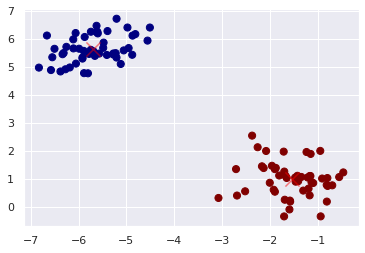

In [6]:
from sklearn.cluster import KMeans

# create dataset
X, y_true = make_blobs(n_samples=100, centers=2,
                       cluster_std=0.60, random_state=85747)

# create numpy array of shape(2,2) with some float numbers
centers = np.array([[-6.0, 2.0], [-2.0, 5.0]])

# run k-means
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# get new centers
centers = kmeans.cluster_centers_

# plot the result
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='jet');
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='red', s=200, alpha=0.5);

#### Exercise 1: 

Try k-means for other datasets (below). Does it perform well?

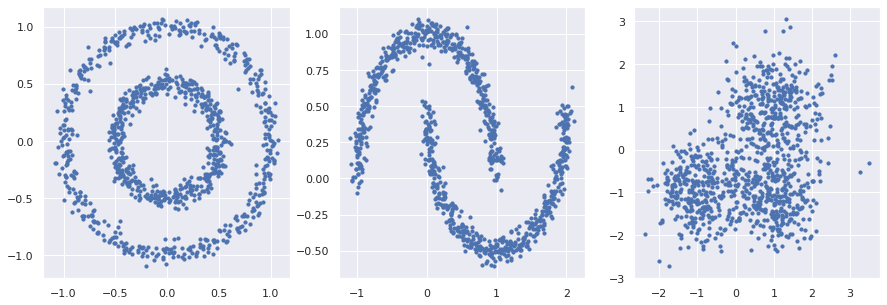

In [7]:
from sklearn.datasets import make_circles, make_moons

n_samples=1000

X_c, y_c = make_circles(n_samples=n_samples, factor=.5, noise=.05)
X_m, y_m = make_moons(n_samples=n_samples, noise=.05)

c_points = [[1, 1], [-1, -1], [1, -1]]
X_d, y_d = make_blobs(n_samples=n_samples, centers=c_points, cluster_std=0.6)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(X_c[:, 0], X_c[:, 1], s=10);
plt.subplot(1,3,2)
plt.scatter(X_m[:, 0], X_m[:, 1], s=10);
plt.subplot(1,3,3)
plt.scatter(X_d[:, 0], X_d[:, 1], s=10);

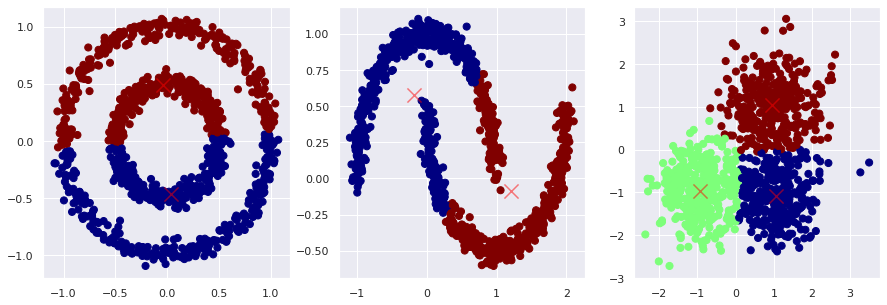

In [9]:
# (1): put your code here

# circles dataset
# put your code here

y_kmeans_c = # put your code here
centers_c = # put your code here

# moons dataset
# put your code here
y_kmeans_m = # put your code here
centers_m = # put your code here

# dense blobs dataset
# put your code here
y_kmeans_d = # put your code here
centers_d = # put your code here

# plot the result
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(X_c[:, 0], X_c[:, 1], c=y_kmeans_c, s=50, cmap='jet');
plt.scatter(centers_c[:, 0], centers_c[:, 1], marker='x', c='red', s=200, alpha=0.5);

plt.subplot(1,3,2)
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_kmeans_m, s=50, cmap='jet');
plt.scatter(centers_m[:, 0], centers_m[:, 1], marker='x', c='red', s=200, alpha=0.5);

plt.subplot(1,3,3)
plt.scatter(X_d[:, 0], X_d[:, 1], c=y_kmeans_d, s=50, cmap='jet');
plt.scatter(centers_d[:, 0], centers_d[:, 1], marker='x', c='red', s=200, alpha=0.5);

**Limitations of $k$-means:**

- clusters of different sizes
- clusters of different densities
- clusters of non-globular shapes
- outliers in the dataset

See also the [chapter on k-means](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html) in [4].

What to do if you have non-convex clusters?

#### DBSCAN

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped.

How it works?
![DBSCAN](dbscan.png)
Image from https://cs.wmich.edu/alfuqaha/summer14/cs6530/lectures/ClusteringAnalysis.pdf

- *Density* at point $A$ is a number of points within the circle of radius $\epsilon$ centered ar this point

- *Dense region* is a circle of radius $\epsilon$ than contains at least `min_samples` of points.

- *Core point* is the center point of the *dense region*

- *Border point* is not in the center of the dense region, but it's distance to the core point is less or equal to $\epsilon$.

- *Noise point* is neither core, nor border point.

Any core point is part of a cluster, by definition. Any point that is not a core point, and is at least $\epsilon$ in distance from any core sample, is considered an outlier by the algorithm.

The `DBSCAN` algorithm is implemented in [`scikit-learn`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). It has two main parameters:

- `min_samples` - controls how tolerant the algorithm is towards noise. The more noisy are your data, the larger this perameter should be.
- `eps` - controls the local neighborhood of the points. It is crutial to choose this parameter properly. If it is too small, most of the data will be labeled as noise and not clustered at all. If it is too large, you will get a one big cluster.

Let's try it in praxis.

**Exercise 2:**

apply DBSCAN to the datasets from the previous exercise. The code is based on the [DBSCAN demo](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html) at the `scikit-learn` page. The code is pre-implemented for "circles" dataset. Your task is to apply it also to "moons" and "dense blobs" datasets. 

**Question**: how does it perform for these datasets in comparison to $k$-means?

Estimated number of clusters: 2
Estimated number of noise points: 0


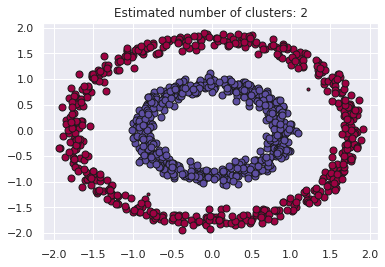

In [29]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# circles dataset
X = StandardScaler().fit_transform(X_c)
labels_true = y_c

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot the result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

**Gaussian mixture models (GMM)**

Every object is assigned to all clusters with a probability:

$$p(x|\theta) = \sum\limits_{k=1}^K \gamma_k \mathcal{N}(x|\mu_k, \Sigma_k)$$
where $\theta = \{\gamma_1,\dots, \gamma_K, \mu_1,\dots,\mu_K, \Sigma_1, \dots,\Sigma_K\}$ is a set of parameters, $K$ is a number of clusters, and $\mathcal{N}(x|\mu, \Sigma)$ is a multivariate normal distribution with parameters mean $\mu\in\mathbb{R}^d$ and covariance matrix $\Sigma\in\mathbb{R}^{d\times d}$:

$$\mathcal{N}(x|\mu, \Sigma) = \frac{1}{\left(2\pi\right)^{d/2}\left(\det\Sigma\right)^{1/2}}\exp\left(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\right)$$

To fit GMM usually expectation-maximization (EM) algorithm is applied. It works in the following way. Let's introduce a latent variable $c$ as a number of the cluster an object $x$ belongs to:

$$p(c=k|\theta) = \gamma_k$$
$$p(x|c=k,\theta) = \mathcal{N}(x|\mu_k,\Sigma_k)$$
$$p(x|\theta) = \sum\limits_{k=1}^K p(x|c=k,\theta)p(c=k| \theta)$$

To estimate parameters $\theta$, we need following steps:

1. Start with randomly chosen parameters $\theta$
2. Until convergency repeat:
    - *E-step*: for each point $x_i$ compute $p(c=k|x_i,\theta)$ as:
    $$r_{ik} = p(c=k|x_i,\theta) = \frac{\gamma_k\mathcal{N}(x_i|\mu_k,\Sigma_k)}{\sum\limits_{k=1}^K \mathcal{N}(x_i|\mu_k,\Sigma_k)}$$
    - *M-step*: update parameters $\theta$ accordingly:
    $$\gamma_k = \frac{\sum\limits_{i=1}^N r_{ik}}{N},\;\; \mu_k = \frac{\sum\limits_{i=1}^N r_{ik}x_i}{\sum\limits_{i=1}^N r_{ik}},\;\; \Sigma_k = \frac{\sum\limits_{i=1}^N r_{ik}(x_i-\mu_k)(x_i-\mu_k)^T}{\sum\limits_{i=1}^N r_{ik}}$$

`scikit-learn` offers two methods: [`GaussianMixture`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) and [`BayesianGaussianMixture`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html#sklearn.mixture.BayesianGaussianMixture]). The `BayesianGaussianMixture` object implements a variant of the Gaussian mixture model with variational inference algorithms. Variational inference is an extension of expectation-maximization that maximizes a lower bound on model evidence (including priors) instead of data likelihood [3].

#### Exercise 3: Use `GaussianMixture`

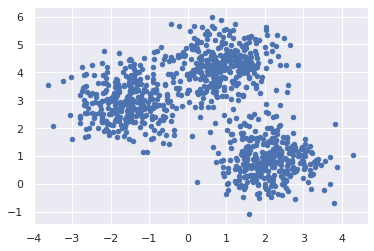

In [6]:
from sklearn.datasets import make_blobs

# generate a toy dataset
X, y_true = make_blobs(n_samples=1000, centers=3,
                       cluster_std=0.70, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=20);

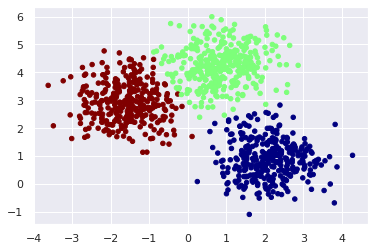

In [7]:
from sklearn.mixture import GaussianMixture as GMM

#(1): fit GMM with argument n_components=3 and make prediction for X
gmm = # put your code here
labels = # put your code here

# plot the result
plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='jet');

Since GMM is a soft clustering algorithm, we can get for each point the probability that it belongs to the given cluster using `predict_proba` method:

In [8]:
probs = gmm.predict_proba(X)
print(probs[60:70].round(3))

[[0.    0.002 0.998]
 [0.    0.    1.   ]
 [0.    0.001 0.999]
 [0.    0.    1.   ]
 [0.    0.962 0.038]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.004 0.996]
 [0.    0.065 0.935]]


One can visualize probabilities using the point size:

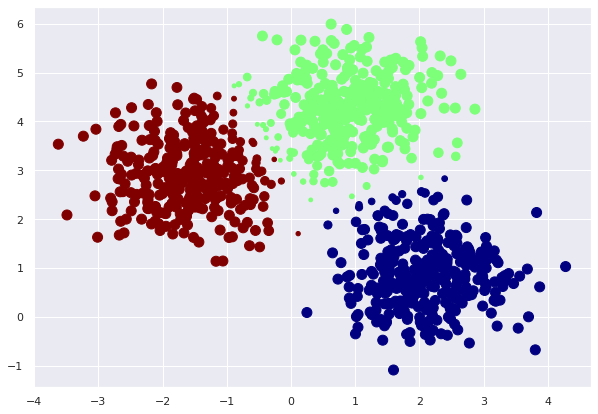

In [9]:
size = 100 * probs.max(1) ** 3  # to emphasizes differences
plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='jet', s=size);

#### Exercise 4$^*$: advanced (optional)

Use GMM for generating new data. The code is taken from [chapter on GMM](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html) of the book [4].

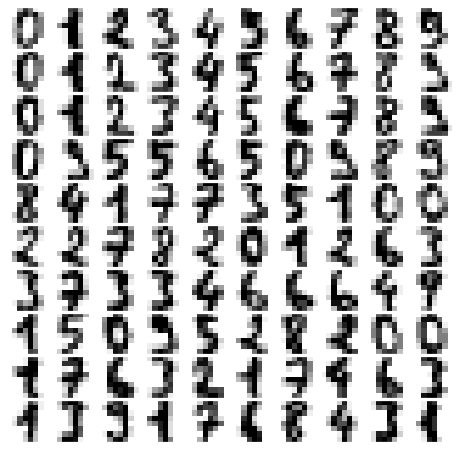

In [10]:
from sklearn.datasets import load_digits

digits = load_digits()

def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)

plot_digits(digits.data)

In [11]:
# reduce dimensionality of the dataset
# otherwise GMM might not converge
# for example, use PCA

from sklearn.decomposition import PCA

#(2):
pca = # put your code here, set arguments n_components=0.99 and whiten=True
data = # put your code here
data.shape

(1797, 41)

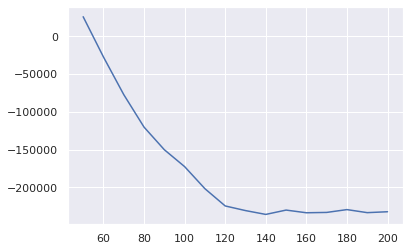

In [12]:
# use GMM to find out the number of components we should use
n_components = np.arange(50, 210, 10)
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

[Akaike information criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) is a method for scoring and selecting a model.

In [13]:
%%time
# AIC is minimized at around 140 components

# (3): take the number of components from the plot above,
#    it should correspond to the minimum of AIC
gmm = GMM(<put your number here>, covariance_type='full', random_state=0)
# put your code here: run fit

print(gmm.converged_)

True
CPU times: user 6.38 s, sys: 7.31 s, total: 13.7 s
Wall time: 1.82 s


CPU times: user 1.35 s, sys: 1.07 s, total: 2.42 s
Wall time: 1.14 s


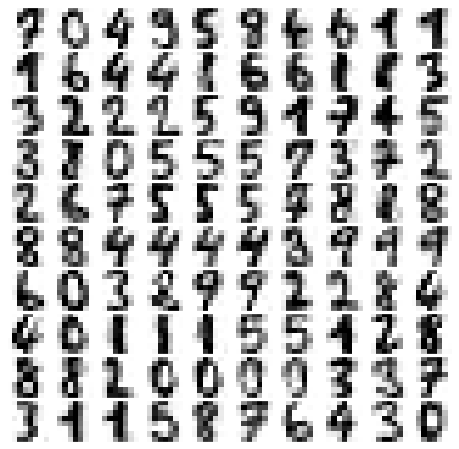

In [14]:
%%time
# sample 100 new points
data_new = gmm.sample(100)[0]

# do inverse transform and plot
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)

We can generate new digits!

### Other clustering methods

An overview of clustering methods available in `scikit-learn` can be found in [2] and top-5 is presented in [6]. However, clustering algorithms are not limited with those implementes in `scikit-learn`. See, for example, [7, 8, 9] for more information on clustering using the deep neural networks.

### References

[[1]](https://en.wikipedia.org/wiki/Cluster_analysis) Wikipedia *Cluster analysis*

[[2]](https://scikit-learn.org/stable/modules/clustering.html) Scikit-learn documentation on clustering

[[3]](https://scikit-learn.org/stable/modules/mixture.html) Scikit-learn documentation on GMM

[[4]](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) Jake VanderPlas *Python data science handbook*, O'Reilly (2016)

[[5]](https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec) Chaitanya Reddy Patlolla, *Understanding the concept of Hierarchical clustering Technique*

[[6]](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68) George Seif, *The 5 Clustering Algorithms Data Scientists Need to Know*

[[7]](https://doi.org/10.1109/ICPR.2014.272) P. Huang, Y. Huang, W. Wang and L. Wang, *Deep Embedding Network for Clustering,* (2014), 22nd International Conference on Pattern Recognition, Stockholm, Sweden, 2014, pp. 1532-1537, doi: 10.1109/ICPR.2014.272.

[[8]](https://towardsdatascience.com/image-clustering-implementation-with-pytorch-587af1d14123) Anders Ohrn, *Image Clustering Implementation with PyTorch*

[[9]](https://arxiv.org/abs/1807.05520) Mathilde Caron, Piotr Bojanowski, Armand Joulin, Matthijs Douze, *Deep Clustering for Unsupervised Learning of Visual Features* (2018),  	arXiv:1807.05520

## Solutions

Do not forget to take care of indentations.

### Hard clustering 

#### Exercise 1 ($k$-means): 
Snippet (1):

```python

# circles dataset
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_c)
y_kmeans_c = kmeans.predict(X_c)
centers_c = kmeans.cluster_centers_

# moons dataset
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_m)
y_kmeans_m = kmeans.predict(X_m)
centers_m = kmeans.cluster_centers_

# dense blobs dataset
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_d)
y_kmeans_d = kmeans.predict(X_d)
centers_d = kmeans.cluster_centers_

```

#### Exercise 2 (DBSCAN): 

To apply the code to the other datasets, you need just to change this part of the code:

```python
# circles dataset
X = StandardScaler().fit_transform(X_c)
labels_true = y_c
```

Thus, for "moons" dataset it will be:

```python
# moons dataset
X = StandardScaler().fit_transform(X_m)
labels_true = y_m
```

And for "dense blobs" dataset:

```python
# dense blobs dataset
X = StandardScaler().fit_transform(X_d)
labels_true = y_d
```

If you run the code, you will see, that DBSCAN with choosen parameters performs quite well for "moons" and "circles" datasets. However, for the "dense blobs" it produces just a one big cluster instead of 3. 


### Soft clustering (GMM)

Snippet (1):

```python
gmm = GMM(n_components=3).fit(X)
labels = gmm.predict(X)
```

Snippet (2):

```python
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
```

Snippet (3):

Depending on versions of `scikit-learn` the number can be different. In my case it is `140`. 

```python
gmm = GMM(140, covariance_type='full', random_state=0)
gmm.fit(data)
```